In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

In [3]:
import warnings
warnings.filterwarnings('ignore')

## P1
A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [4]:
cutlets = pd.read_csv('Cutlets.csv')

In [5]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [6]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


<AxesSubplot:xlabel='Unit A', ylabel='Density'>

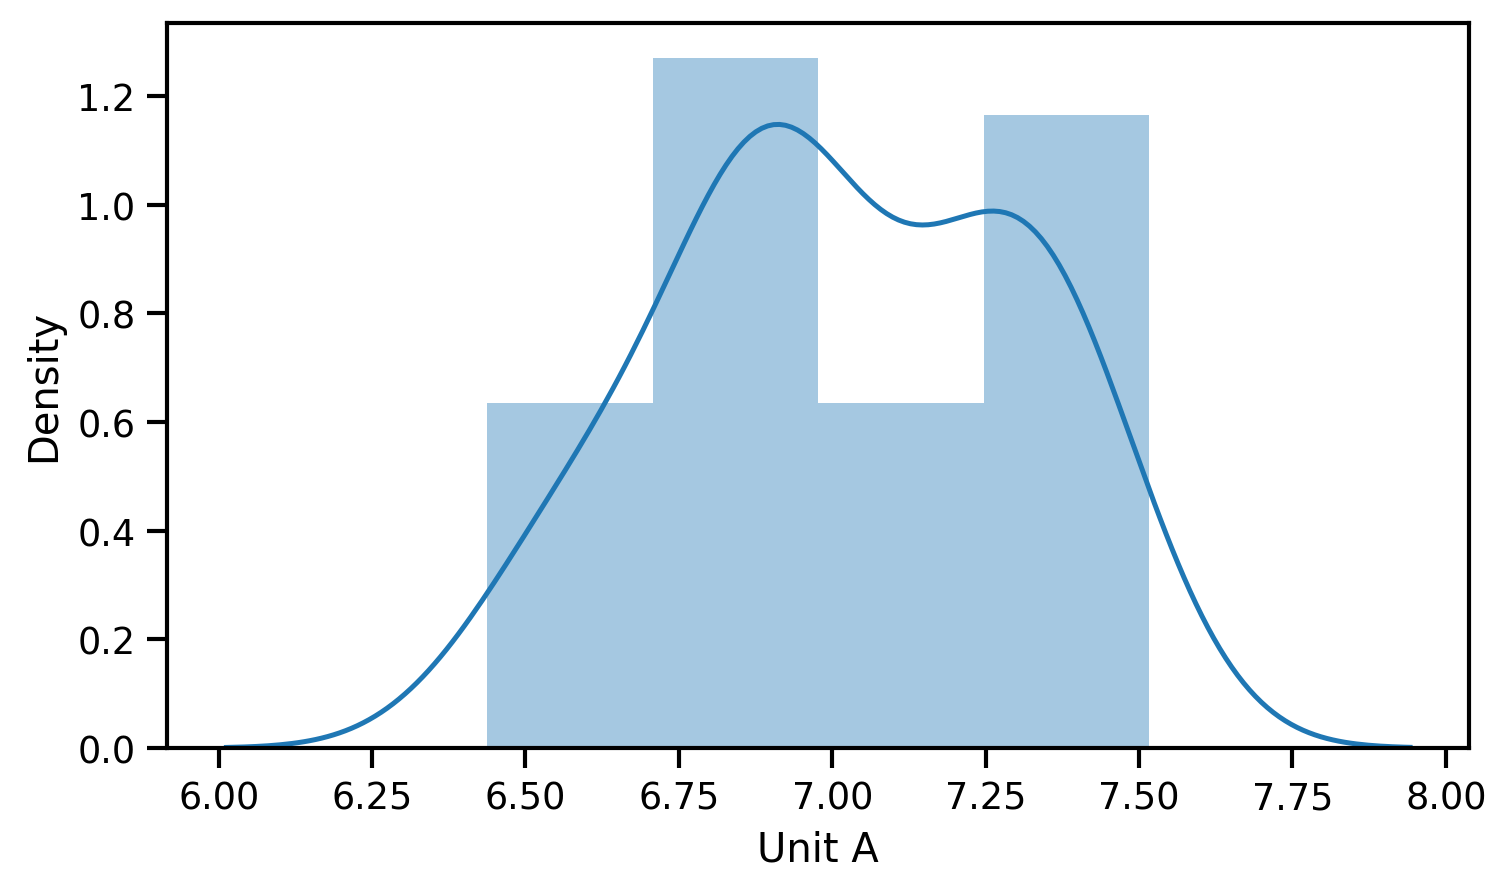

In [7]:
sns.distplot(cutlets['Unit A'])

<AxesSubplot:xlabel='Unit B', ylabel='Density'>

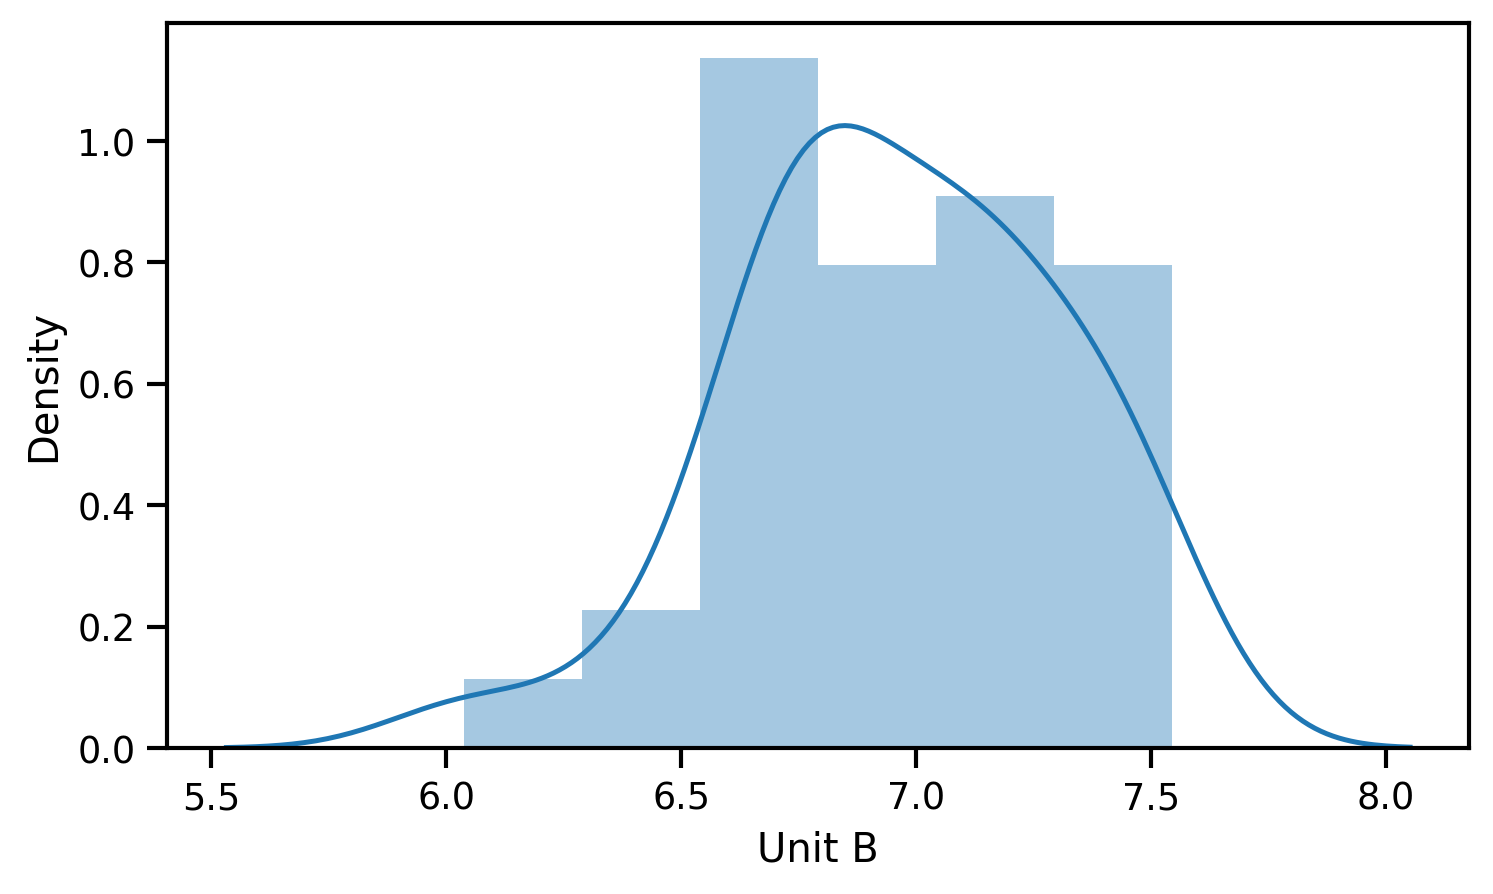

In [8]:
sns.distplot(cutlets['Unit B'])

In [9]:
# Equal variance check:
var_unitA = cutlets['Unit A'].var()
var_unitB = cutlets['Unit B'].var()

In [10]:
if (var_unitA) <= (var_unitB):
    var_ratio = var_unitB/var_unitA
    if 1< var_ratio < 3:
        equal_var_test = True
    else:
        equal_var_test = False
else:
    var_ratio = var_unitA/var_unitB
    if 1< var_ratio < 3:
        equal_var_test = True
    else:
        equal_var_test = False
print(equal_var_test)

True


### Observations:
* Samples from Unit A and B belong to same class of object - cutlet
* The samples are independent of each other
* Number of samples = 35 which is greater than 30 thus we can assume normal distribution by central limit theorem. We can see from the plots as well that data is somewhat normally distributed.
* Data from Unit and Unit B are both 1D.
* We can use two sample t-test for inference 

### Hypothesis
**H0**: No difference in the diameters of cutlets made by the two units.

**H1**: There is a significant difference in the diameters of cutlets made by the two units.

In [11]:
t_score, pvalue = stats.ttest_ind(a=cutlets['Unit A'], b=cutlets['Unit B'], equal_var=equal_var_test)
print(pvalue)

0.47223947245995


In [12]:
if pvalue*2 < 0.05:
    print('We reject H0; There is a significant difference in the diameters of cutlets made by the two units.The result is significant at p value {:.5f}'.format(pvalue))
else:
    print('We fail to reject H0; There is no difference in the diameters of cutlets made by the two units.')

We fail to reject H0; There is no difference in the diameters of cutlets made by the two units.


## P2
A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [13]:
tat_df = pd.read_csv('LabTAT.csv')

In [14]:
tat_df.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [15]:
# Ref: https://www.reneshbedre.com/blog/anova.html
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(tat_df.reset_index(), id_vars=['index'], value_vars=['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 'Laboratory 4'])

# replace column names
df_melt.columns = ['index', 'treatments', 'value']

In [16]:
df_melt.tail(5)

,index,treatments,value
475,115,Laboratory 4,172.68
476,116,Laboratory 4,177.64
477,117,Laboratory 4,170.27
478,118,Laboratory 4,150.87
479,119,Laboratory 4,162.21


In [17]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments

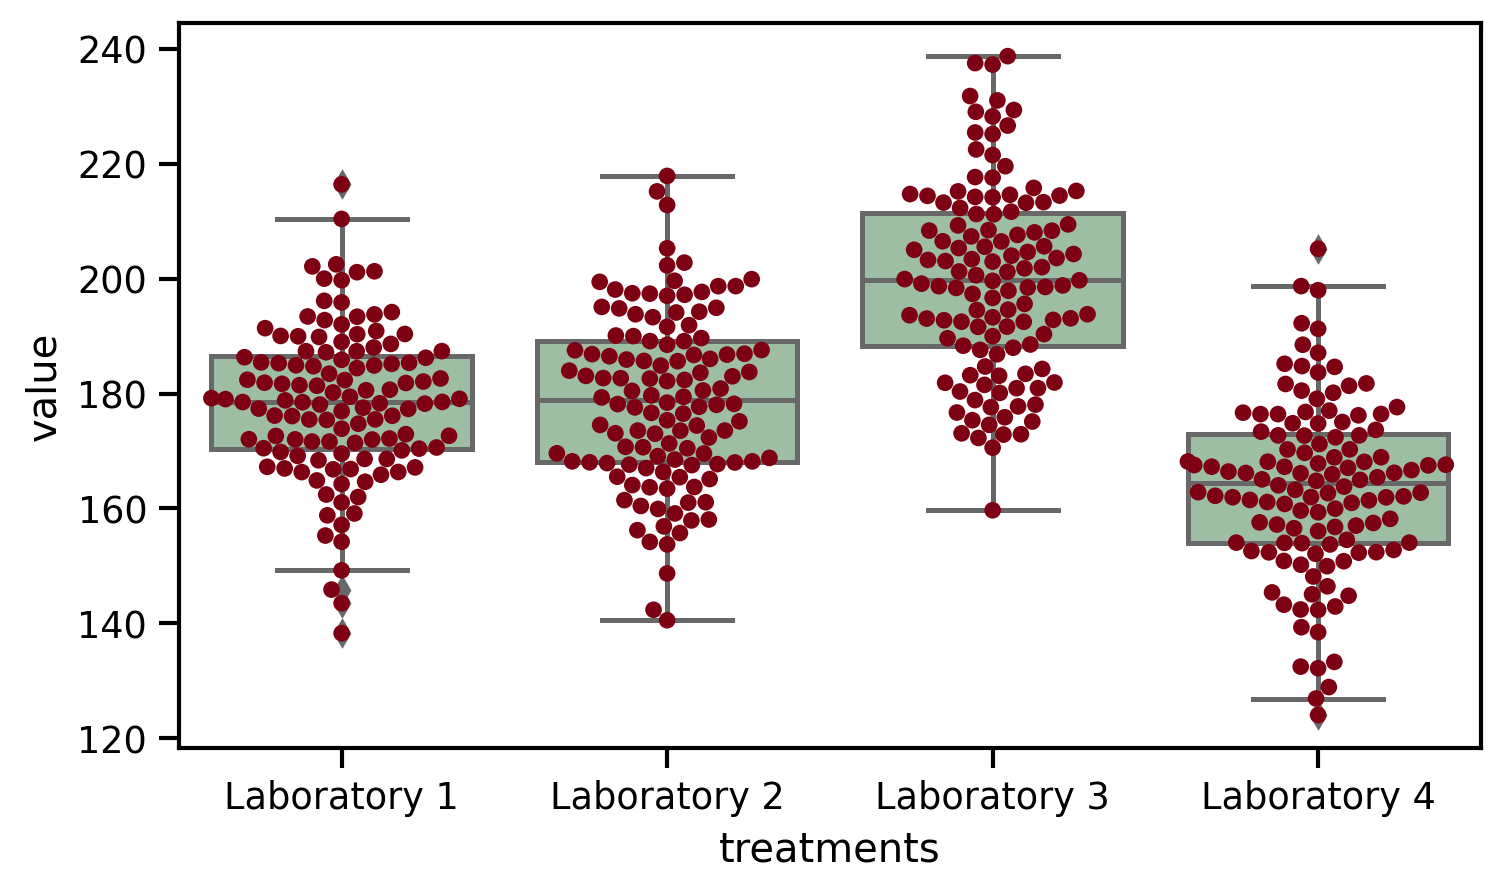

In [18]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

### Observations:
* The data of the average TAT from each of the laboratories can be considered independent. 
* The number of samples is large, hence we can assume noramlity for each column.
* Since there are four laboratories in the study, we should use one way ANOVA to check if there is any difference in the average TAT.

### Hypothesis
**H0**: No difference in the average Turn Around Time (TAT) of reports of the laboratories.

**H1**: There is a significant difference in the average Turn Around Time (TAT) of reports of the laboratories.


In [19]:
f_stat, pvalue = stats.f_oneway(tat_df['Laboratory 1'],tat_df['Laboratory 2'],tat_df['Laboratory 3'],tat_df['Laboratory 4'])

In [20]:
f_stat,pvalue

(118.70421654401437, 2.1156708949992414e-57)

In [21]:
if pvalue>0.05:
    print("Retain H0. The result is not significant at alpha = 0.05")
else:
    print("Reject H0. The result is significant at {}".format(pvalue))

Reject H0. The result is significant at 2.1156708949992414e-57


## P3
Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [22]:
male_buyer_ratio = [50,142,131,70]
female_buyer_ratio = [550,351,480,350]

### Hypothesis
**H0**: All proportions are equal.

**H1**: Not all proportions are equal.

In [23]:
buyer_ratio = [male_buyer_ratio,female_buyer_ratio]

In [24]:
stat, pvalue, dof, expected = stats.chi2_contingency(buyer_ratio)

In [25]:
stat, pvalue, dof,expected 

(80.27295426602495,
 2.682172557281901e-17,
 3,
 array([[111.01694915,  91.21892655, 113.05225989,  77.71186441],
        [488.98305085, 401.78107345, 497.94774011, 342.28813559]]))

In [26]:
if pvalue>0.05:
    print("Retain H0. The result is not significant at alpha = 0.05")
else:
    print("Reject H0. The result is significant at {}".format(pvalue))

Reject H0. The result is significant at 2.682172557281901e-17


## P4:
TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.

In [27]:
order_form_df = pd.read_csv('Costomer+OrderForm.csv')

In [28]:
order_form_df.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [29]:
count_err_free = order_form_df[order_form_df=="Error Free"].count()
count_defect = order_form_df[order_form_df=="Defective"].count()

In [30]:
countries = order_form_df.columns

In [31]:
error_free = []
defectives = []

for country in countries:
    error_free.append(count_err_free[country])
    defectives.append(count_defect[country])

In [32]:
print(error_free)

[271, 267, 269, 280]


In [33]:
print(defectives)

[29, 33, 31, 20]


### Hypothesis
**H0**: All proportions of defective forms are equal.

**H1**: Not all proportions of defective forms are equal.

In [34]:
form_cat = [error_free,defectives]
stat, pvalue, dof, expected = stats.chi2_contingency(form_cat)

In [35]:
stat, pvalue, dof, expected

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [36]:
if pvalue>0.05:
    print("Retain H0. The result is not significant at alpha = 0.05")
else:
    print("Reject H0. The result is significant at {}".format(pvalue))

Retain H0. The result is not significant at alpha = 0.05
